# In

In [ ]:
# imports

import numpy as np
import matplotlib.pyplot as plt


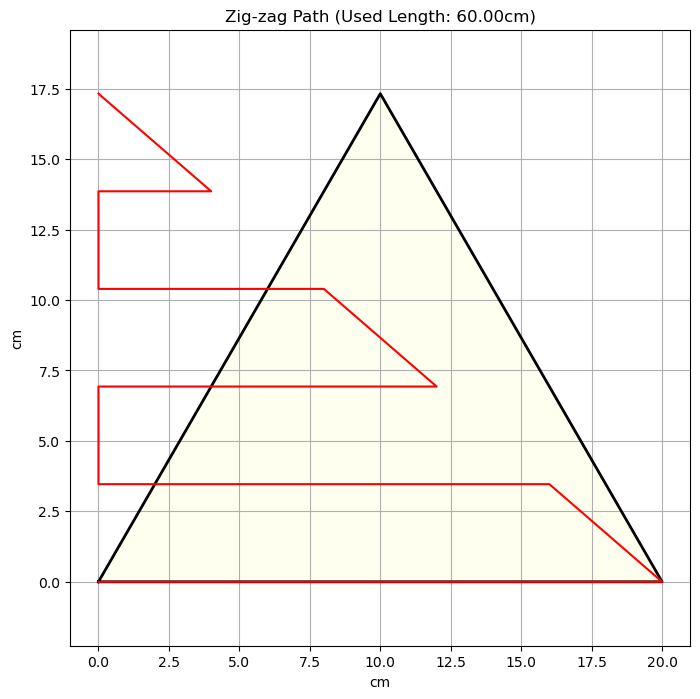

In [ ]:
# Triangle dimensions
L = 20  # side length (cm)

# Thread length constraint
thread_length = 70  # cm

# Function to calculate zig-zag path points
def zigzag_path(L, thread_length, num_zigs):
    points = []
    total_length = 0
    
    height = np.sqrt(3) * L / 2
    
    for i in range(num_zigs + 1):
        y = height * (i / num_zigs)
        segment_length = L * (1 - (i / num_zigs))

        if total_length + segment_length > thread_length:
            break

        if i % 2 == 0:
            points.append((0, y))
            points.append((segment_length, y))
        else:
            points.append((segment_length, y))
            points.append((0, y))

        total_length += segment_length

    return points, total_length

# Estimate number of zig-zags (tuning parameter)
num_zigs = 5

# Generate the path
points, used_length = zigzag_path(L, thread_length, num_zigs)

# Plotting
triangle = np.array([[0, 0], [L, 0], [L/2, np.sqrt(3)*L/2], [0, 0]])
triangle_path = np.array(points)

plt.figure(figsize=(8, 8))
plt.plot(triangle[:, 0], triangle[:, 1], 'k-', lw=2)
plt.plot(triangle_path[:, 0], triangle_path[:, 1], 'r-', lw=1.5)
plt.fill(triangle[:, 0], triangle[:, 1], color='lightyellow', alpha=0.5)
plt.title(f'Zig-zag Path (Used Length: {used_length:.2f}cm)')
plt.axis('equal')
plt.grid(True)
plt.xlabel('cm')
plt.ylabel('cm')
plt.show()


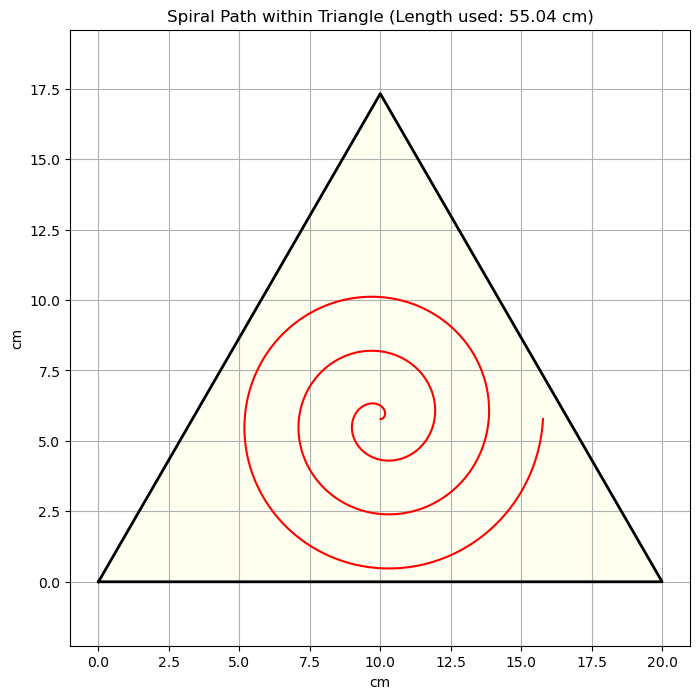

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Triangle dimensions
L = 20  # side length (cm)
thread_length = 70  # cm

# Triangle vertices (equilateral triangle)
v1 = np.array([0, 0])
v2 = np.array([L, 0])
v3 = np.array([L / 2, (np.sqrt(3) / 2) * L])

# Function to check if a point is inside the triangle
def inside_triangle(pt, v1, v2, v3):
    d1 = np.sign((pt[0] - v2[0]) * (v1[1] - v2[1]) - (v1[0] - v2[0]) * (pt[1] - v2[1]))
    d2 = np.sign((pt[0] - v3[0]) * (v2[1] - v3[1]) - (v2[0] - v3[0]) * (pt[1] - v3[1]))
    d3 = np.sign((pt[0] - v1[0]) * (v3[1] - v1[1]) - (v3[0] - v1[0]) * (pt[1] - v1[1]))
    return (d1 == d2) and (d2 == d3)

# Spiral curve generation within triangle
def spiral_within_triangle(v1, v2, v3, thread_length, num_points=1000):
    centroid = (v1 + v2 + v3) / 3
    max_radius = L / (2 * np.sqrt(3))

    theta = np.linspace(0, 6 * np.pi, num_points)
    radii = np.linspace(0, max_radius, num_points)

    points = []
    length_used = 0

    for i in range(1, num_points):
        x = centroid[0] + radii[i] * np.cos(theta[i])
        y = centroid[1] + radii[i] * np.sin(theta[i])
        pt = np.array([x, y])

        if inside_triangle(pt, v1, v2, v3):
            if points:
                length_used += np.linalg.norm(pt - points[-1])
                if length_used > thread_length:
                    break
            points.append(pt)

    return np.array(points), length_used

# Generate spiral path
path, length_used = spiral_within_triangle(v1, v2, v3, thread_length)

# Plot
plt.figure(figsize=(8, 8))
triangle = np.array([v1, v2, v3, v1])
plt.plot(triangle[:, 0], triangle[:, 1], 'k-', lw=2)
plt.fill(triangle[:, 0], triangle[:, 1], color='lightyellow', alpha=0.5)
plt.plot(path[:, 0], path[:, 1], 'r-', lw=1.5)
plt.axis('equal')
plt.title(f'Spiral Path within Triangle (Length used: {length_used:.2f} cm)')
plt.grid(True)
plt.xlabel('cm')
plt.ylabel('cm')
plt.show()
